In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import numpy as np
from scipy.stats import boxcox
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_validate,StratifiedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,confusion_matrix,make_scorer
import pickle
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn import metrics


In [2]:
db=pd.read_csv('d1.csv')

In [3]:
db.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,DAYS_EMPLOYED,...,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,Age_group
0,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Working,637,...,1.0,179055.0,Y,XAP,Approved,606,New,-25.0,0.0,Adult
1,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,1188,...,0.0,1035882.0,Y,XNA,Approved,746,Repeater,-536.0,1.0,Middle-age
2,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,1188,...,0.0,348637.5,Y,XAP,Approved,828,Refreshed,-647.0,0.0,Middle-age
3,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,1188,...,0.0,68053.5,Y,XAP,Approved,2341,Refreshed,-1980.0,1.0,Middle-age
4,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Working,225,...,0.0,20106.0,Y,XAP,Approved,815,New,-724.0,0.0,Middle-age


In [4]:
for col in db.columns:
    print('Unique Values of ' + col +':')
    print(db[col].unique())
    print("========================")


Unique Values of TARGET:
[1 0]
Unique Values of NAME_CONTRACT_TYPE_x:
['Cash loans' 'Revolving loans']
Unique Values of CODE_GENDER:
['M' 'F' 'XNA']
Unique Values of FLAG_OWN_CAR:
['N' 'Y']
Unique Values of FLAG_OWN_REALTY:
['Y' 'N']
Unique Values of AMT_INCOME_TOTAL:
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
Unique Values of AMT_CREDIT_x:
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
Unique Values of AMT_ANNUITY_x:
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
Unique Values of NAME_INCOME_TYPE:
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Maternity leave']
Unique Values of DAYS_EMPLOYED:
[  637  1188   225 ... 12971 11084  8694]
Unique Values of DAYS_REGISTRATION:
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
Unique Values of DAYS_ID_PUBLISH:
[2120  291 2531 ... 5906 5854 6211]
Unique Values of FLAG_MOBIL:
[1]
Unique Values of FLAG_CONT_MOBILE:
[1 0]
Unique Values of FLAG_EMAIL:
[0 1]
Unique Valu

In [5]:
d_col=['DAYS_LAST_DUE']

In [6]:

for col in d_col:
    db[col]=db[col].abs()

In [7]:
## Encoding

In [8]:
db1=db.copy()

In [9]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349060 entries, 0 to 1349059
Data columns (total 30 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1349060 non-null  int64  
 1   NAME_CONTRACT_TYPE_x         1349060 non-null  object 
 2   CODE_GENDER                  1349060 non-null  object 
 3   FLAG_OWN_CAR                 1349060 non-null  object 
 4   FLAG_OWN_REALTY              1349060 non-null  object 
 5   AMT_INCOME_TOTAL             1349060 non-null  float64
 6   AMT_CREDIT_x                 1349060 non-null  float64
 7   AMT_ANNUITY_x                1349060 non-null  float64
 8   NAME_INCOME_TYPE             1349060 non-null  object 
 9   DAYS_EMPLOYED                1349060 non-null  int64  
 10  DAYS_REGISTRATION            1349060 non-null  float64
 11  DAYS_ID_PUBLISH              1349060 non-null  int64  
 12  FLAG_MOBIL                   1349060 non-n

In [10]:
impt_feat=["TARGET","NAME_CONTRACT_TYPE_x","CODE_GENDER","AMT_INCOME_TOTAL","AMT_CREDIT_x","DAYS_EMPLOYED","NAME_INCOME_TYPE","OCCUPATION_TYPE",
           "ORGANIZATION_TYPE","NAME_CASH_LOAN_PURPOSE","DAYS_LAST_DUE","Age_group","AMT_REQ_CREDIT_BUREAU_YEAR","NFLAG_INSURED_ON_APPROVAL",
           "AMT_ANNUITY_x","NAME_CLIENT_TYPE","AMT_REQ_CREDIT_BUREAU_WEEK","NAME_CONTRACT_STATUS","FLAG_OWN_REALTY","AMT_REQ_CREDIT_BUREAU_MON"]

In [11]:
len(impt_feat)

20

In [12]:
data=db1[impt_feat]

In [13]:
data.shape

(1349060, 20)

In [14]:
data.duplicated().sum()

np.int64(192688)

In [15]:
data.drop_duplicates(inplace=True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_1440\2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [16]:
data.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,DAYS_EMPLOYED,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_CASH_LOAN_PURPOSE,DAYS_LAST_DUE,Age_group,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL,AMT_ANNUITY_x,NAME_CLIENT_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,NAME_CONTRACT_STATUS,FLAG_OWN_REALTY,AMT_REQ_CREDIT_BUREAU_MON
0,1,Cash loans,M,202500.0,406597.5,637,Working,Laborers,Business Entity Type 3,XAP,25.0,Adult,1.0,0.0,24700.5,New,0.0,Approved,Y,0.0
1,0,Cash loans,F,270000.0,1293502.5,1188,State servant,Core staff,School,XNA,536.0,Middle-age,0.0,1.0,35698.5,Repeater,0.0,Approved,N,0.0
2,0,Cash loans,F,270000.0,1293502.5,1188,State servant,Core staff,School,XAP,647.0,Middle-age,0.0,0.0,35698.5,Refreshed,0.0,Approved,N,0.0
3,0,Cash loans,F,270000.0,1293502.5,1188,State servant,Core staff,School,XAP,1980.0,Middle-age,0.0,1.0,35698.5,Refreshed,0.0,Approved,N,0.0
4,0,Revolving loans,M,67500.0,135000.0,225,Working,Laborers,Government,XAP,724.0,Middle-age,0.0,0.0,6750.0,New,0.0,Approved,Y,0.0


In [17]:
data.shape

(1156372, 20)

In [18]:
col=data.select_dtypes(include='object').columns

In [19]:
col

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'NAME_INCOME_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_CASH_LOAN_PURPOSE',
       'Age_group', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS',
       'FLAG_OWN_REALTY'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1156372 entries, 0 to 1349059
Data columns (total 20 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   TARGET                      1156372 non-null  int64  
 1   NAME_CONTRACT_TYPE_x        1156372 non-null  object 
 2   CODE_GENDER                 1156372 non-null  object 
 3   AMT_INCOME_TOTAL            1156372 non-null  float64
 4   AMT_CREDIT_x                1156372 non-null  float64
 5   DAYS_EMPLOYED               1156372 non-null  int64  
 6   NAME_INCOME_TYPE            1156372 non-null  object 
 7   OCCUPATION_TYPE             1156372 non-null  object 
 8   ORGANIZATION_TYPE           1156372 non-null  object 
 9   NAME_CASH_LOAN_PURPOSE      1156372 non-null  object 
 10  DAYS_LAST_DUE               1156372 non-null  float64
 11  Age_group                   1156372 non-null  object 
 12  AMT_REQ_CREDIT_BUREAU_YEAR  1156372 non-null  float64
 13  NF

In [21]:
le = LabelEncoder()

In [22]:
label_encoder={}

In [23]:
for i in col:
    data[i] = le.fit_transform(data[i])
    label_encoder[i] = le

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_1440\1429263501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = le.fit_transform(data[i])
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_1440\1429263501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = le.fit_transform(data[i])
C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_1440\1429263501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [24]:
label_encoder

{'NAME_CONTRACT_TYPE_x': LabelEncoder(),
 'CODE_GENDER': LabelEncoder(),
 'NAME_INCOME_TYPE': LabelEncoder(),
 'OCCUPATION_TYPE': LabelEncoder(),
 'ORGANIZATION_TYPE': LabelEncoder(),
 'NAME_CASH_LOAN_PURPOSE': LabelEncoder(),
 'Age_group': LabelEncoder(),
 'NAME_CLIENT_TYPE': LabelEncoder(),
 'NAME_CONTRACT_STATUS': LabelEncoder(),
 'FLAG_OWN_REALTY': LabelEncoder()}

In [25]:
data.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,DAYS_EMPLOYED,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_CASH_LOAN_PURPOSE,DAYS_LAST_DUE,Age_group,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL,AMT_ANNUITY_x,NAME_CLIENT_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,NAME_CONTRACT_STATUS,FLAG_OWN_REALTY,AMT_REQ_CREDIT_BUREAU_MON
0,1,0,1,202500.0,406597.5,637,6,8,5,23,25.0,0,1.0,0.0,24700.5,0,0.0,0,1,0.0
1,0,0,0,270000.0,1293502.5,1188,3,3,39,24,536.0,1,0.0,1.0,35698.5,2,0.0,0,0,0.0
2,0,0,0,270000.0,1293502.5,1188,3,3,39,23,647.0,1,0.0,0.0,35698.5,1,0.0,0,0,0.0
3,0,0,0,270000.0,1293502.5,1188,3,3,39,23,1980.0,1,0.0,1.0,35698.5,1,0.0,0,0,0.0
4,0,1,1,67500.0,135000.0,225,6,8,11,23,724.0,1,0.0,0.0,6750.0,0,0.0,0,1,0.0


In [26]:
data.shape

(1156372, 20)

In [27]:
# Save the dictionary of label encoders
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [30]:
# checking outlier


<Axes: ylabel='AMT_CREDIT_x'>

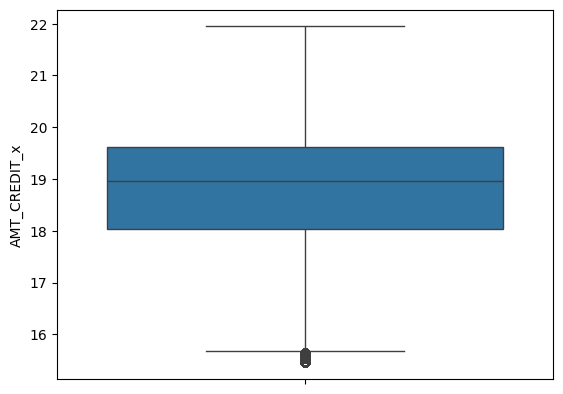

In [31]:

sns.boxplot(data["AMT_CREDIT_x"].apply(lambda x :np.log2(x)))

<Axes: ylabel='AMT_INCOME_TOTAL'>

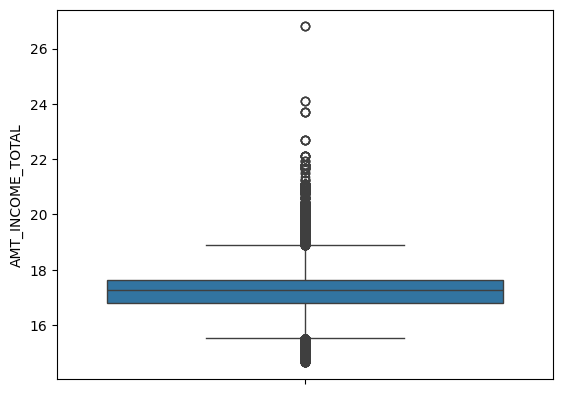

In [32]:
sns.boxplot(data['AMT_INCOME_TOTAL'].apply(lambda x:np.log2(x)))

<Axes: ylabel='AMT_ANNUITY_x'>

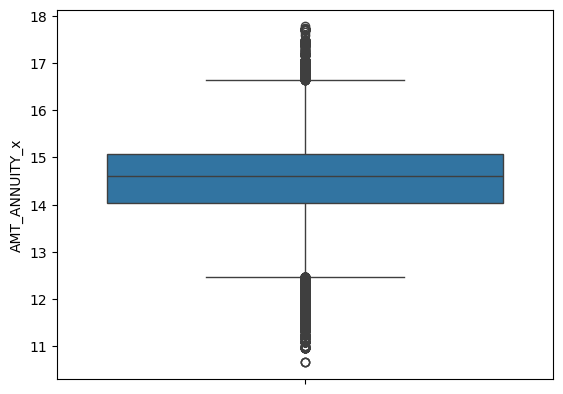

In [33]:
sns.boxplot(data['AMT_ANNUITY_x'].apply(lambda x:np.log2(x)))

In [27]:

features_cols = ["AMT_CREDIT_x", "AMT_ANNUITY_x","AMT_INCOME_TOTAL"]

In [28]:
mm = MinMaxScaler()
data[features_cols] = mm.fit_transform(data[features_cols])

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_1440\2484702816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features_cols] = mm.fit_transform(data[features_cols])


In [29]:
data.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,DAYS_EMPLOYED,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_CASH_LOAN_PURPOSE,DAYS_LAST_DUE,Age_group,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL,AMT_ANNUITY_x,NAME_CLIENT_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,NAME_CONTRACT_STATUS,FLAG_OWN_REALTY,AMT_REQ_CREDIT_BUREAU_MON
0,1,0,1,0.001512,0.090287,637,6,8,5,23,25.0,0,1.0,0.0,0.103342,0,0.0,0,1,0.0
1,0,0,0,0.002089,0.311736,1188,3,3,39,24,536.0,1,0.0,1.0,0.152575,2,0.0,0,0,0.0
2,0,0,0,0.002089,0.311736,1188,3,3,39,23,647.0,1,0.0,0.0,0.152575,1,0.0,0,0,0.0
3,0,0,0,0.002089,0.311736,1188,3,3,39,23,1980.0,1,0.0,1.0,0.152575,1,0.0,0,0,0.0
4,0,1,1,0.000358,0.022472,225,6,8,11,23,724.0,1,0.0,0.0,0.022985,0,0.0,0,1,0.0


# Feature selection

In [30]:
#Splitting dependent and independent features

val= data.drop("TARGET",axis=1)
tar= data["TARGET"]

In [31]:
fs= RandomForestClassifier(n_estimators=900, random_state=89)

In [32]:
fs.fit(val,tar)

RandomForestClassifier(n_estimators=900, random_state=89)

In [33]:
fs.feature_importances_

array([0.00347926, 0.00705966, 0.1159086 , 0.15175783, 0.15337733,
       0.01181594, 0.05254132, 0.07592313, 0.01862223, 0.06680504,
       0.01309568, 0.06779147, 0.01023829, 0.16861818, 0.01663687,
       0.01197699, 0.00762216, 0.02084242, 0.02588759])

In [34]:
fs_score=pd.DataFrame({
    "columns":val.columns,
    "score":fs.feature_importances_
})

In [35]:
fs_score.sort_values("score", ascending=False).head(15)

,columns,score
13,AMT_ANNUITY_x,0.168618
4,DAYS_EMPLOYED,0.153377
3,AMT_CREDIT_x,0.151758
2,AMT_INCOME_TOTAL,0.115909
7,ORGANIZATION_TYPE,0.075923
11,AMT_REQ_CREDIT_BUREAU_YEAR,0.067791
9,DAYS_LAST_DUE,0.066805
6,OCCUPATION_TYPE,0.052541
18,AMT_REQ_CREDIT_BUREAU_MON,0.025888
17,FLAG_OWN_REALTY,0.020842


In [36]:
val

,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,DAYS_EMPLOYED,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_CASH_LOAN_PURPOSE,DAYS_LAST_DUE,Age_group,AMT_REQ_CREDIT_BUREAU_YEAR,NFLAG_INSURED_ON_APPROVAL,AMT_ANNUITY_x,NAME_CLIENT_TYPE,AMT_REQ_CREDIT_BUREAU_WEEK,NAME_CONTRACT_STATUS,FLAG_OWN_REALTY,AMT_REQ_CREDIT_BUREAU_MON
0,0,1,0.001512,0.090287,637,6,8,5,23,25.000000,0,1.0,0.000000,0.103342,0,0.0,0,1,0.0
1,0,0,0.002089,0.311736,1188,3,3,39,24,536.000000,1,0.0,1.000000,0.152575,2,0.0,0,0,0.0
2,0,0,0.002089,0.311736,1188,3,3,39,23,647.000000,1,0.0,0.000000,0.152575,1,0.0,0,0,0.0
3,0,0,0.002089,0.311736,1188,3,3,39,23,1980.000000,1,0.0,1.000000,0.152575,1,0.0,0,0,0.0
4,1,1,0.000358,0.022472,225,6,8,11,23,724.000000,1,0.0,0.000000,0.022985,0,0.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349055,0,0,0.001127,0.157303,1262,0,8,5,24,558.000000,1,1.0,1.000000,0.212647,2,0.0,0,0,2.0
1349056,0,0,0.001127,0.157303,1262,0,8,5,23,76665.634755,1,1.0,0.330572,0.212647,2,0.0,2,0,2.0
1349057,0,0,0.001127,0.157303,1262,0,8,5,20,76665.634755,1,1.0,0.330572,0.212647,2,0.0,2,0,2.0
1349058,0,0,0.001127,0.157303,1262,0,8,5,24,66.000000,1,1.0,0.000000,0.212647,2,0.0,0,0,2.0


In [37]:
selected_features = list(fs_score.sort_values("score", ascending=False).head(15)['columns'].values)

In [38]:
selected_features

['AMT_ANNUITY_x',
 'DAYS_EMPLOYED',
 'AMT_CREDIT_x',
 'AMT_INCOME_TOTAL',
 'ORGANIZATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DAYS_LAST_DUE',
 'OCCUPATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'FLAG_OWN_REALTY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CLIENT_TYPE',
 'Age_group',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'NAME_INCOME_TYPE']

Text(0.5, 0, 'Features score')

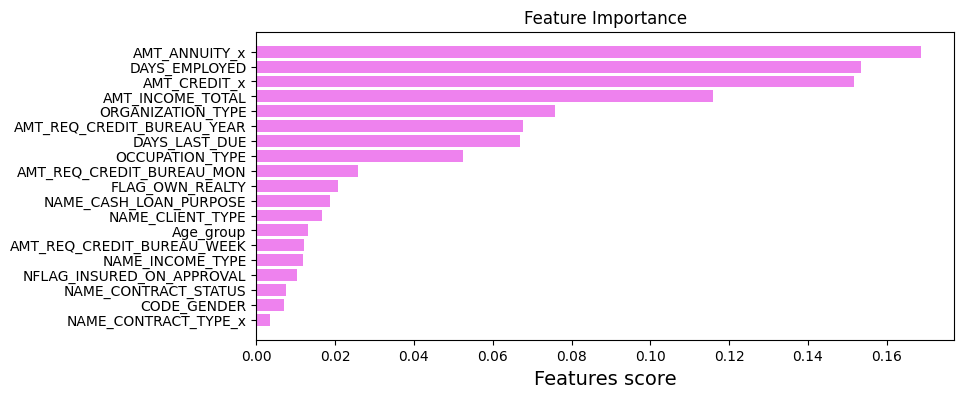

In [39]:
# plot for feature importance

feature_importance = fs.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(9, 4))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx],color = 'violet', align='center')
plt.yticks(range(len(sorted_idx)), np.array(val.columns)[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Features score', fontsize=14)

## Top 5 important features are

      'AMT_ANNUITY_x',
     'DAYS_EMPLOYED',
     'AMT_CREDIT_x',
     'AMT_INCOME_TOTAL',
     'ORGANIZATION_TYPE',

In [47]:
#splitting value and target data

In [40]:
val=val[selected_features]

In [41]:
val

,AMT_ANNUITY_x,DAYS_EMPLOYED,AMT_CREDIT_x,AMT_INCOME_TOTAL,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_DUE,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,FLAG_OWN_REALTY,NAME_CASH_LOAN_PURPOSE,NAME_CLIENT_TYPE,Age_group,AMT_REQ_CREDIT_BUREAU_WEEK,NAME_INCOME_TYPE
0,0.103342,637,0.090287,0.001512,5,1.0,25.000000,8,0.0,1,23,0,0,0.0,6
1,0.152575,1188,0.311736,0.002089,39,0.0,536.000000,3,0.0,0,24,2,1,0.0,3
2,0.152575,1188,0.311736,0.002089,39,0.0,647.000000,3,0.0,0,23,1,1,0.0,3
3,0.152575,1188,0.311736,0.002089,39,0.0,1980.000000,3,0.0,0,23,1,1,0.0,3
4,0.022985,225,0.022472,0.000358,11,0.0,724.000000,8,0.0,1,23,0,1,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349055,0.212647,1262,0.157303,0.001127,5,1.0,558.000000,8,2.0,0,24,2,1,0.0,0
1349056,0.212647,1262,0.157303,0.001127,5,1.0,76665.634755,8,2.0,0,23,2,1,0.0,0
1349057,0.212647,1262,0.157303,0.001127,5,1.0,76665.634755,8,2.0,0,20,2,1,0.0,0
1349058,0.212647,1262,0.157303,0.001127,5,1.0,66.000000,8,2.0,0,24,2,1,0.0,0


In [42]:
tar.value_counts()

TARGET
0    1061538
1      94834
Name: count, dtype: int64

In [43]:
# Doing over sampling to balance the data

smote=SMOTE()
X1,y1 = smote.fit_resample(val,tar)

In [44]:
y1.value_counts()

TARGET
1    1061538
0    1061538
Name: count, dtype: int64

In [45]:
X1.head()

,AMT_ANNUITY_x,DAYS_EMPLOYED,AMT_CREDIT_x,AMT_INCOME_TOTAL,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_DUE,OCCUPATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,FLAG_OWN_REALTY,NAME_CASH_LOAN_PURPOSE,NAME_CLIENT_TYPE,Age_group,AMT_REQ_CREDIT_BUREAU_WEEK,NAME_INCOME_TYPE
0,0.103342,637,0.090287,0.001512,5,1.0,25.0,8,0.0,1,23,0,0,0.0,6
1,0.152575,1188,0.311736,0.002089,39,0.0,536.0,3,0.0,0,24,2,1,0.0,3
2,0.152575,1188,0.311736,0.002089,39,0.0,647.0,3,0.0,0,23,1,1,0.0,3
3,0.152575,1188,0.311736,0.002089,39,0.0,1980.0,3,0.0,0,23,1,1,0.0,3
4,0.022985,225,0.022472,0.000358,11,0.0,724.0,8,0.0,1,23,0,1,0.0,6


# Model building

In [46]:
## Split train and test

traindata,testdata, trainlab, testlab= train_test_split(X1, y1, test_size =0.20, random_state = 63)

In [47]:
traindata.shape

(1698460, 15)

In [48]:
testdata.shape

(424616, 15)

In [49]:
## Performance supporting function

def get_perform(actual,pred):
    acc = accuracy_score(actual,pred) * 100
    prec = precision_score(actual,pred) * 100
    rec = recall_score(actual,pred) * 100
    f1 = f1_score(actual,pred) * 100
    roc= roc_auc_score(actual,pred)*100
    conf_matrix=confusion_matrix(actual,pred)*100
    
    return pd.DataFrame({
    "accuracy":[acc],
    "precision":[prec],
    "recall":[rec],
    "F1_score":[f1],
    "ROCAUC": [roc],
    "Conf_mat":[conf_matrix]
    })

In [58]:
## Decision tree 


In [59]:
dt_model =DecisionTreeClassifier(criterion='entropy', random_state=67)

In [60]:
dt_model.fit(traindata, trainlab)

DecisionTreeClassifier(criterion='entropy', random_state=67)

In [61]:
dttr_pred=dt_model.predict(traindata)
dtts_pred=dt_model.predict(testdata)

In [62]:
## Training performance
get_perform(trainlab,dttr_pred)

,accuracy,precision,recall,F1_score,ROCAUC,Conf_mat
0,99.996585,99.998234,99.994937,99.996586,99.996585,"[[84910800, 1500], [4300, 84929400]]"


In [63]:
## Test performance
get_perform(testlab,dtts_pred)

,accuracy,precision,recall,F1_score,ROCAUC,Conf_mat
0,92.919249,92.306013,93.636222,92.966359,92.919611,"[[19585300, 1656200], [1350400, 19869700]]"


In [64]:
## RAndom Forest



In [65]:
rf_model =RandomForestClassifier(n_estimators=800, random_state=63, criterion = 'entropy', max_depth=10)

In [66]:
rf_model.fit(traindata,trainlab)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=700,
                       random_state=54)

In [67]:
rf_tr_pred=rf_model.predict(traindata)
rf_ts_pred=rf_model.predict(testdata)

In [68]:
## Training performance
get_perform(trainlab,rf_tr_pred)

,accuracy,precision,recall,F1_score,ROCAUC,Conf_mat
0,79.467989,85.625818,70.831837,77.529399,79.469077,"[[74813100, 10099200], [24773600, 60160100]]"


In [69]:
get_perform(testlab,rf_ts_pred)

,accuracy,precision,recall,F1_score,ROCAUC,Conf_mat
0,79.474631,85.554816,70.899289,77.540639,79.470312,"[[18701300, 2540200], [6175200, 15044900]]"


In [ ]:
# GradientBoostingClassifier


In [56]:


gbc = GradientBoostingClassifier(learning_rate=0.4, n_estimators=200, max_depth=10, random_state=67)

In [57]:
gbc.fit(traindata, trainlab)

GradientBoostingClassifier(learning_rate=0.4, max_depth=10, n_estimators=200,
                           random_state=67)

In [58]:
gbc_train_pred = gbc.predict(traindata)
gbc_test_pred = gbc.predict(testdata)

In [59]:
get_perform(trainlab,gbc_train_pred)

,accuracy,precision,recall,F1_score,ROCAUC,Conf_mat
0,97.774513,99.261028,96.266264,97.740712,97.774703,"[[84303600, 608700], [3171200, 81762500]]"


In [60]:
get_perform(testlab,gbc_test_pred)

,accuracy,precision,recall,F1_score,ROCAUC,Conf_mat
0,96.649679,98.626974,94.613126,96.578364,96.648653,"[[20962000, 279500], [1143100, 20077000]]"


In [ ]:
## XGB classifier



In [51]:
xg = XGBClassifier(n_estimators=600,random_state=67,learning_rate=0.17,
                       max_depth=10,min_child_weight=3)

In [52]:

xg.fit(traindata,trainlab)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=67, ...)

In [53]:
xg_train_pred = xg.predict(traindata)
xg_test_pred = xg.predict(testdata)

In [54]:
get_perform(trainlab,xg_train_pred)

,accuracy,precision,recall,F1_score,ROCAUC,Conf_mat
0,97.721995,99.519736,95.907396,97.68018,97.722224,"[[84519200, 393100], [3476000, 81457700]]"


In [55]:
get_perform(testlab,xg_test_pred)

,accuracy,precision,recall,F1_score,ROCAUC,Conf_mat
0,96.485766,98.890249,94.02312,96.395286,96.484525,"[[21017600, 223900], [1268300, 19951800]]"


In [ ]:
# Saving the model



In [61]:
with open("Finalxg.pkl", "wb") as file:
    pickle.dump(xg, file)

In [62]:
with open("Finalgb.pkl", "wb") as file:
    pickle.dump(gbc, file)

In [63]:
with open('C:\\Users\\SG_LENOVO\\Downloads\Finalxg.pkl', "rb") as modelxg:
    xg_model1 = pickle.load(modelxg)

In [64]:
with open('C:\\Users\\SG_LENOVO\\Downloads\Finalgb.pkl', "rb") as modelgb:
    gb_model1 = pickle.load(modelgb)